In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

from sklearn.metrics import  precision_recall_curve, auc
from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold 
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from pandas import MultiIndex, Int64Index
from sklearn.metrics import classification_report, confusion_matrix, f1_score

<ipython-input-12-1049b22c9c1e>:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [49]:
#Evaluation Metrics

def compute_mcc(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion matrix", cm)
    tn, fp, fn, tp = cm.ravel()
    print( "tn=",tn, "fp=",fp, "fn=",fn, "tp=",tp)
    mcc = (tp*tn - fp*fn) / (np.sqrt(  (tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)  ) + 1e-8)
    print("mcc = ", mcc)
    return round(mcc,3)
    
def compute_sensitivity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp/(tp+fn)
    return round(sensitivity,3)
    
def compute_specificity(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn/(fp+tn)
    return round(specificity,3)
    
def compute_accuracy(y_true, y_pred):
    accuracy = (y_true==y_pred).sum()/len(y_true)
    return round(accuracy,3)

def compute_precision(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    precision = tn/(tn+fp)
    return round(precision,3)

def compute_f1(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average="macro" , zero_division=1)
    return round(f1,3)

In [50]:
# read feature file

df_master = pd.read_csv("FeatureVector_Freezed_Final_NoBMD.csv")
print(df_master.shape)
featurelist = list(df_master.columns)
print(len(featurelist))
print(featurelist)
#print(df['class'].value_counts()) 

(500, 99)
99
['CT_BONE_MASS_ANDROID VISCERAL (CoreScan)', 'CT_BONE_MASS_ANDROID', 'CT_BONE_MASS_ARMS', 'CT_BONE_MASS_GYNOID', 'CT_BONE_MASS_LEGS', 'CT_BONE_MASS_TOTAL', 'CT_BONE_MASS_TRUNK', 'CT_FAT_MASS_ANDROID VISCERAL (CoreScan)', 'CT_FAT_MASS_ANDROID', 'CT_FAT_MASS_Appendicular Lean Mass/Height_ for Age Index', 'CT_FAT_MASS_ARMS', 'CT_FAT_MASS_GYNOID', 'CT_FAT_MASS_Legs/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_LEGS', 'CT_FAT_MASS_Limbs/Trunk Fat Mass Ratio for Age Index', 'CT_FAT_MASS_Total Body Fat Mass/Height_ for Age Index', 'CT_FAT_MASS_Total Body Lean Mass/Height_ for Age Index', 'CT_FAT_MASS_TOTAL', 'CT_FAT_MASS_Trunk/Legs %Fat Ratio for Age Index', 'CT_FAT_MASS_Trunk/Limbs Fat Mass Ratio for Age Index', 'CT_FAT_MASS_Trunk/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_TRUNK', 'CT_LEAN_MASS_ANDROID VISCERAL (CoreScan)', 'CT_LEAN_MASS_ANDROID', 'CT_LEAN_MASS_ARMS', 'CT_LEAN_MASS_GYNOID', 'CT_LEAN_MASS_LEGS', 'CT_LEAN_MASS_TOTAL', 'CT_LEAN_MASS_TRUNK', 'DT_AREA_ARMS

In [51]:

BONE_MASS = ['CT_BONE_MASS_ANDROID VISCERAL (CoreScan)', 'CT_BONE_MASS_ANDROID', 'CT_BONE_MASS_ARMS', 'CT_BONE_MASS_GYNOID', 'CT_BONE_MASS_LEGS', 'CT_BONE_MASS_TOTAL', 'CT_BONE_MASS_TRUNK', 'class']

FAT_MASS = ['CT_FAT_MASS_ANDROID VISCERAL (CoreScan)', 'CT_FAT_MASS_ANDROID', 'CT_FAT_MASS_Appendicular Lean Mass/Height_ for Age Index', 'CT_FAT_MASS_ARMS', 'CT_FAT_MASS_GYNOID', 
            'CT_FAT_MASS_Legs/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_LEGS', 'CT_FAT_MASS_Limbs/Trunk Fat Mass Ratio for Age Index', 'CT_FAT_MASS_Total Body Fat Mass/Height_ for Age Index', 
            'CT_FAT_MASS_Total Body Lean Mass/Height_ for Age Index', 'CT_FAT_MASS_TOTAL', 'CT_FAT_MASS_Trunk/Legs %Fat Ratio for Age Index', 'CT_FAT_MASS_Trunk/Limbs Fat Mass Ratio for Age Index', 
            'CT_FAT_MASS_Trunk/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_TRUNK', 'class']
            
            
#             'CT_FAT_MASS_ANDROID VISCERAL (CoreScan)', 'CT_FAT_MASS_ANDROID', 'CT_FAT_MASS_Appendicular Lean Mass/Height_ for Age Index', 
#             'CT_FAT_MASS_ARMS', 'CT_FAT_MASS_GYNOID', 'CT_FAT_MASS_Legs/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_LEGS', 'CT_FAT_MASS_Limbs/Trunk Fat Mass Ratio for Age Index', 
#             'CT_FAT_MASS_Total Body Fat Mass/Height_ for Age Index', 'CT_FAT_MASS_Total Body Lean Mass/Height_ for Age Index', 'CT_FAT_MASS_TOTAL', 'CT_FAT_MASS_Trunk/Legs %Fat Ratio for Age Index', 
#             'CT_FAT_MASS_Trunk/Limbs Fat Mass Ratio for Age Index', 'CT_FAT_MASS_Trunk/Total Fat Mass Ratio for Age Index', 'CT_FAT_MASS_TRUNK', 'class']


LEAN_MASS = ['CT_LEAN_MASS_ANDROID VISCERAL (CoreScan)', 'CT_LEAN_MASS_ANDROID', 'CT_LEAN_MASS_ARMS', 'CT_LEAN_MASS_GYNOID', 'CT_LEAN_MASS_LEGS', 'CT_LEAN_MASS_TOTAL', 'CT_LEAN_MASS_TRUNK', 'class']

BMC = ['DT_BMC_ARMS', 'DT_BMC_HEAD', 'DT_BMC_L1', 'DT_BMC_L1_L2', 'DT_BMC_L1_L3', 'DT_BMC_L1_L4', 'DT_BMC_L2', 'DT_BMC_L2_L3', 'DT_BMC_L2_L4', 'DT_BMC_L3', 'DT_BMC_L3_L4', 'DT_BMC_L4', 
       'DT_BMC_LEGS', 'DT_BMC_LOWER NECK', 'DT_BMC_NECK ', 'DT_BMC_PELVIS', 'DT_BMC_RIBS', 'DT_BMC_SHAFT', 'DT_BMC_SPINE', 'DT_BMC_TOTAL', 'DT_BMC_TROCH', 'DT_BMC_TRUNK', 
       'DT_BMC_UPPER NECK', 'DT_BMC_WARDS', 'class']

ANTHRO = ['DT_AREA_ARMS', 'DT_AREA_HEAD', 'DT_AREA_L1', 'DT_AREA_L1_L2', 'DT_AREA_L1_L3', 'DT_AREA_L1_L4', 'DT_AREA_L2', 'DT_AREA_L2_L3', 'DT_AREA_L2_L4', 'DT_AREA_L3', 'DT_AREA_L3_L4', 'DT_AREA_L4', 
          'DT_AREA_LEGS', 'DT_AREA_LOWER NECK', 'DT_AREA_NECK ', 'DT_AREA_PELVIS', 'DT_AREA_RIBS', 'DT_AREA_SHAFT', 'DT_AREA_SPINE', 'DT_AREA_TOTAL', 'DT_AREA_TROCH', 'DT_AREA_TRUNK', 'DT_AREA_UPPER NECK', 
          'DT_AREA_WARDS', 'DT_AVG_HEIGHT_L1', 'DT_AVG_HEIGHT_L1_L2', 'DT_AVG_HEIGHT_L1_L3', 'DT_AVG_HEIGHT_L1_L4', 'DT_AVG_HEIGHT_L2', 'DT_AVG_HEIGHT_L2_L3', 'DT_AVG_HEIGHT_L2_L4', 'DT_AVG_HEIGHT_L3', 
          'DT_AVG_HEIGHT_L3_L4', 'DT_AVG_HEIGHT_L4', 'DT_AVG_WIDTH_L1', 'DT_AVG_WIDTH_L1_L2', 'DT_AVG_WIDTH_L1_L3', 'DT_AVG_WIDTH_L1_L4', 'DT_AVG_WIDTH_L2', 'DT_AVG_WIDTH_L2_L3', 'DT_AVG_WIDTH_L2_L4', 
          'DT_AVG_WIDTH_L3', 'DT_AVG_WIDTH_L3_L4', 'DT_AVG_WIDTH_L4', 'MT_AVG_HEIGHT_HIP AXIS LENGTH', 'class']

# BMD = ['DT_BMD_ARMS', 'DT_BMD_HEAD', 'DT_BMD_L1', 'DT_BMD_L1_L2', 'DT_BMD_L1_L3', 'DT_BMD_L1_L4', 'DT_BMD_L2', 'DT_BMD_L2_L3', 'DT_BMD_L2_L4', 'DT_BMD_L3', 'DT_BMD_L3_L4', 'DT_BMD_L4', 
#        'DT_BMD_LEGS', 'DT_BMD_LOWER NECK', 'DT_BMD_NECK ', 'DT_BMD_PELVIS', 'DT_BMD_RIBS', 'DT_BMD_SHAFT', 'DT_BMD_SPINE', 'DT_BMD_TOTAL', 'DT_BMD_TROCH', 'DT_BMD_TRUNK', 'DT_BMD_UPPER NECK', 
#        'DT_BMD_WARDS']

print(len(BONE_MASS))
print(len(FAT_MASS))
print(len(LEAN_MASS))
print(len(BMC))
print(len(ANTHRO))
#print(len(BMD))




df_BONE_MASS = df_master[BONE_MASS]
print(df_BONE_MASS.shape)
#display(df_BONE_MASS)

df_FAT_MASS = df_master[FAT_MASS]
print(df_FAT_MASS.shape)
#display(df_FAT_MASS)

df_LEAN_MASS = df_master[LEAN_MASS]
print(df_LEAN_MASS.shape)
#display(df_LEAN_MASS)

df_BMC = df_master[BMC]
print(df_BMC.shape)
#display(df_BMC)

df_ANTHRO = df_master[ANTHRO]
print(df_ANTHRO.shape)
#display(df_ANTHRO)


8
16
8
25
46
(500, 8)
(500, 16)
(500, 8)
(500, 25)
(500, 46)


In [54]:
#
# ####################################
# 
# Manual calculations of performance measures 
#

#dfs = [df_BONE_MASS, df_FAT_MASS, df_LEAN_MASS, df_BMC, df_ANTHRO ]
#dfs = [df_LEAN_MASS, df_FAT_MASS, df_BONE_MASS, df_BMC, df_ANTHRO]
#data_set = ['LEAN_MASS', 'FAT_MASS','BONE_MASS','BMC','ANTHRO']

dfs = [df_FAT_MASS]
data_set = ['FAT_MASS']

# classifiers = [RandomForestClassifier(random_state=42), 
#                xgb.XGBClassifier(eval_metric='rmse', use_label_encoder=False, verbosity = 0, random_state=42),
#                CatBoostClassifier(verbose = False, random_state=42),
#                AdaBoostClassifier(n_estimators=100, random_state=42),
#                LogisticRegression(random_state=42),
#                LinearDiscriminantAnalysis(),
#                GaussianNB(),
#                tree.DecisionTreeClassifier(random_state=42),
#                svm.SVC(random_state=42),
#                GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
#                BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42) 
#               ]

# classifiers = [AdaBoostClassifier(n_estimators=100, random_state=42),
#                xgb.XGBClassifier(eval_metric='rmse', use_label_encoder=False, silent=True, verbosity=0,  random_state=42),
#                CatBoostClassifier(verbose = False, random_state=42),
#                GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42),
#                RandomForestClassifier(random_state=42),
#                tree.DecisionTreeClassifier(random_state=42),
#                LinearDiscriminantAnalysis(),
#                BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42),
#                svm.SVC(random_state=42),
#                GaussianNB() 
#               ]

classifiers = [
               GaussianNB() 
              ]

with open('./Ablation_Study_DXA_NoBMD_10Fold_CrossValidationRuns.txt', 'w') as cvresults:
    ds_index = 0
    for df in dfs:
        print("ds index = ",ds_index)
        cvresults.write(str(data_set[ds_index]) + "\n")
        cvresults.write("Classifer,"+"Sen(%)," + "Spe(%)," + "ACC(%)," + "Pre(%)," + "F1(%)," + "MCC," + "\n")
        print(df['class'].value_counts()) 
        y = df["class"]
        X = df.drop(["class"], axis=1)
        scaler = StandardScaler()
        X = scaler.fit_transform(X)
        X = pd.DataFrame(X)
        k = 10
        kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
        for clf in classifiers:
            model = clf
            mcc_score = []
            sen_score = []
            spe_score = []
            acc_score = []
            pre_score = []
            F1_score  = []

            for train_index , test_index in kf.split(X,y):
                X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
                y_train , y_test = y[train_index] , y[test_index]
                model.fit(X_train,y_train)
                pred_values = model.predict(X_test)
                #print(classification_report(y_test, pred_values))
                mcc = compute_mcc(y_test, pred_values)
                sen = compute_sensitivity(y_test, pred_values)
                spe = compute_specificity(y_test, pred_values)
                acc = compute_accuracy(y_test, pred_values)
                pre = compute_precision(y_test, pred_values)
                F1  = compute_f1(y_test, pred_values)
                #F1 = (2*pre*sen)/(pre+sen)
                # precision, recall, thresholds = precision_recall_curve(y_test, pred_values)
                # auc_precision_recall = auc(recall, precision)
                mcc_score.append(mcc)
                sen_score.append(sen)
                spe_score.append(spe)
                pre_score.append(pre)
                acc_score.append(acc)
                F1_score.append(F1)

            avg_mcc_score = sum(mcc_score) / k
            avg_sen_score = sum(sen_score) / k
            avg_spe_score = sum(spe_score) / k
            avg_acc_score = sum(acc_score) / k
            avg_pre_score = sum(pre_score) / k
            avg_f1_score = sum(F1_score)  / k

            print(clf)
            #print('Sensitivity of each fold - {}'.format(sen_score))
            print('Avg Sensitivity : {}'.format(round(avg_sen_score,3)*100))

            #print('Specifity of each fold - {}'.format(spe_score))
            print('Avg Specifity : {}'.format(round(avg_spe_score,3)*100))

            #print('accuracy of each fold - {}'.format(acc_score))
            print('Avg accuracy : {}'.format(round(avg_acc_score,3)*100))

            #print('Precision of each fold - {}'.format(pre_score))
            print('Avg Precision : {}'.format(round(avg_pre_score,3)*100))


            #print('F1 of each fold - {}'.format(F1_score))
            print('Avg F1 : {}'.format(round(avg_f1_score,3)*100))

            #print('mcc of each fold - {}'.format(mcc_score))
            print('Avg mcc : {}'.format(round(avg_mcc_score,3)*100))

            #print('AUC of each fold - {}'.format(Roc_AUC_score))
            #print('Avg AUC : {}'.format(round(avg_AUC_score,3)*100))
            #print('Avg PR AUC : {}'.format(round(avg_PRAUC_score,3)*100))

            ResultsSummary = (str(round(avg_sen_score,3)*100) + "," + 
                              str(round(avg_spe_score,3)*100) + "," + 
                              str(round(avg_acc_score,3)*100) + "," + 
                              str(round(avg_pre_score,3)*100) + "," +
                              str(round(avg_f1_score,3)*100) + "," +
                              str(round(avg_mcc_score,3 )*100) 
                             )
            cvresults.write(str(clf)+","+str(ResultsSummary + "\n"))
        ds_index+=1
        print("========================================================")

ds index =  0
0    432
1     68
Name: class, dtype: int64
Confusion matrix [[31 12]
 [ 1  6]]
tn= 31 fp= 12 fn= 1 tp= 6
mcc =  0.41788305282553434
Confusion matrix [[28 15]
 [ 2  5]]
tn= 28 fp= 15 fn= 2 tp= 5
mcc =  0.25884144292816563
Confusion matrix [[26 17]
 [ 4  3]]
tn= 26 fp= 17 fn= 4 tp= 3
mcc =  0.023531040266196873
Confusion matrix [[34  9]
 [ 3  4]]
tn= 34 fp= 9 fn= 3 tp= 4
mcc =  0.28646443541080946
Confusion matrix [[30 13]
 [ 2  5]]
tn= 30 fp= 13 fn= 2 tp= 5
mcc =  0.2978017158067026
Confusion matrix [[34  9]
 [ 3  4]]
tn= 34 fp= 9 fn= 3 tp= 4
mcc =  0.28646443541080946
Confusion matrix [[31 12]
 [ 4  3]]
tn= 31 fp= 12 fn= 4 tp= 3
mcc =  0.11320083081044684
Confusion matrix [[27 16]
 [ 4  3]]
tn= 27 fp= 16 fn= 4 tp= 3
mcc =  0.040374580799515114
Confusion matrix [[36  8]
 [ 4  2]]
tn= 36 fp= 8 fn= 4 tp= 2
mcc =  0.12309149097554484
Confusion matrix [[29 15]
 [ 4  2]]
tn= 29 fp= 15 fn= 4 tp= 2
mcc =  -0.005196926822365227
GaussianNB()
Avg Sensitivity : 53.800000000000004
Av

ds index =  0
0    432
1     68
Name: class, dtype: int64
   CT_FAT_MASS_ANDROID VISCERAL (CoreScan)  CT_FAT_MASS_ANDROID  \
0                               826.606967          2112.046722   
1                               391.716886          1884.759439   
2                               600.813518          2173.644376   
3                               745.143906          1662.381916   
4                               785.993257          1436.564999   

   CT_FAT_MASS_Appendicular Lean Mass/Height_ for Age Index  CT_FAT_MASS_ARMS  \
0                                           5.564742              3099.292145   
1                                           6.019438              2577.260962   
2                                           6.323459              2551.918145   
3                                           6.585979              2957.579488   
4                                           5.609316              1432.819412   

   CT_FAT_MASS_GYNOID  CT_FAT_MASS_Legs/Total Fat Ma

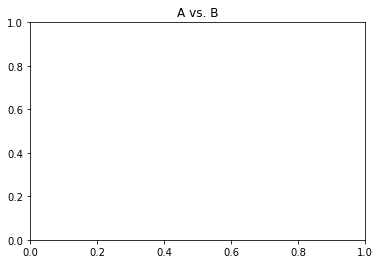

In [47]:

import matplotlib.pyplot as plt

# 
# Visualize data
#

#dfs = [df_BONE_MASS, df_FAT_MASS, df_LEAN_MASS, df_BMC, df_ANTHRO ]
#dfs = [df_LEAN_MASS, df_FAT_MASS, df_BONE_MASS, df_BMC, df_ANTHRO]
#data_set = ['LEAN_MASS', 'FAT_MASS','BONE_MASS','BMC','ANTHRO']

dfs = [df_FAT_MASS]
data_set = ['FAT_MASS']


ds_index = 0
for df in dfs:
    print("ds index = ",ds_index)
    print(df['class'].value_counts())
    print(df.head())
    y = df["class"]
    X = df.drop(["class"], axis=1)
    A = df[df["class"] == 0]
    B = df[df["class"] == 1]
    plt.title("A vs. B")
    plt.xlabel("")
    plt.ylabel("")
    
    plt.scatter(A["CT_FAT_MASS_ANDROID VISCERAL (CoreScan)"], A["CT_FAT_MASS_ANDROID"], color = "red", label = "Malignant", alpha = 0.3)
    # plt.scatter(B.radius_mean, B.texture_mean, color = "lime", label = "Benign", alpha = 0.3)
    # plt.legend()
    # plt.show()
    ds_index+=1
    print("========================================================")

In [4]:
# from sklearn.metrics import  precision_recall_curve, auc
# from catboost import CatBoostClassifier
# from sklearn.model_selection import KFold 
# from sklearn.metrics import roc_auc_score

# #classifiers = [RandomForestClassifier(random_state=42), XGBClassifier(eval_metric='rmse', use_label_encoder=False, random_state=42)]
# classifiers = [RandomForestClassifier(random_state=42)]

# #DM3_mRNAloc/mRNALoc_datasets/training/Extracellular_region/Features_Combined_Pseknc_Extracellular_region_k2-5_encode8.csv

# datasets = ["./Extracellular_region/Features_Combined_Pseknc_Extracellular_region_k2-5_encode8.csv",
#             "./Endoplasmic_reticulum/Features_Combined_Pseknc_Endoplasmic_reticulumk2-5_encode8.csv",
#             "./Cytoplasm/Features_Combined_Pseknc_Cytoplasm_k2-5_encode8.csv",
#             "./Mitochondria/Features_Combined_Pseknc_Mitochondria_k2-5_encode8.csv", 
#             "./Nucleus/Features_Combined_Pseknc_Nucleus_k2-5_encode8.csv"
#            ]

# Localization = ["Extracellular_region","Endoplasmic_reticulum","Cytoplasm", "Mitochondria","Nucleus"]

# loc = 0
# for ds in datasets:
#     df = pd.read_csv(ds)
#     print(df.shape)
#     loc+=1
#     print("========================================================")

Using Fastai

In [7]:
pwd

'/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training'

In [6]:
from fastai.tabular.all import *

In [8]:
path = Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training')
path.ls()

(#43) [Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/Formated'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/mRNALoc_5_with_extra_3_locations_CrossValidationRuns_Catboost.csv'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/mRNALocCrossValidationRuns_RF.csv'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/Cytoplasm'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/Nucleus'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/PosteriorVRdataset_Pseknc_2-5_with_extra_3_loc.csv'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/Mitochondria'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/CytosolVRdataset_Pseknc_2-5_with_extra_3_loc.csv'),Path('/home/smusleh/repos/localization/DM3_mRNAloc/mRNALoc_datasets/training/Pseudopodium'),Path('/home/smusleh/repos/loc

In [165]:
#df_fai = pd.read_csv(path/'MitochondriaVRdataset_Pseknc_2-5_with_extra_3_loc.csv')

df_fai = pd.read_csv(path/'MitochondriaVRdataset_Pseknc_2-5_with_extra_3_loc.csv')

df_fai.head()

,label,AA,AC,AG,AT,CA,CC,CG,CT,GA,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,Mitochondria,0.030770,0.022067,0.025237,0.023683,0.022689,0.012805,0.015043,0.019767,0.028345,...,0.000560,0.000435,0.001182,0.000498,0.000498,0.000684,0.000498,0.000498,0.000995,0.000498
1,Mitochondria,0.036808,0.021684,0.023549,0.025482,0.030247,0.018715,0.006146,0.021132,0.019336,...,0.000207,0.000691,0.000553,0.000138,0.000622,0.000622,0.001658,0.001175,0.000829,0.005182
2,Mitochondria,0.036039,0.016502,0.030513,0.022262,0.025375,0.021094,0.007317,0.026543,0.027710,...,0.000078,0.000857,0.000312,0.000545,0.000701,0.000623,0.000389,0.000779,0.000312,0.001168
3,Mitochondria,0.031720,0.017292,0.020581,0.029492,0.022490,0.012730,0.010290,0.019626,0.025037,...,0.000319,0.000425,0.001274,0.000956,0.000743,0.000956,0.000106,0.000956,0.000956,0.000849
4,Mitochondria,0.026277,0.016047,0.017050,0.026277,0.018053,0.011433,0.008224,0.024271,0.017852,...,0.001005,0.002009,0.000804,0.000603,0.001005,0.001607,0.000804,0.001808,0.001005,0.000000


In [166]:
# !conda list fastai vversion 2.5.3

fealist = list (df_fai.columns)
fealist = fealist [1:]
#fealist

norm = Normalize()
to = TabularPandas(fai,norm,cont_names=fealist)

In [167]:
norms = to.procs.normalize

In [168]:
#norms.means
#norms.stds
to.conts.head()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,...,TTTCG,TTTCT,TTTGA,TTTGC,TTTGG,TTTGT,TTTTA,TTTTC,TTTTG,TTTTT
0,-0.108342,0.737223,0.061281,-0.049743,-0.651519,-0.786359,0.875531,-0.633515,0.716312,0.011360,...,1.474169,-0.506519,1.000501,0.121542,-0.351752,0.320510,-0.314539,-0.287198,0.582898,-0.513348
1,0.544667,0.615444,-0.216800,0.227809,1.207778,-0.192352,-1.000995,-0.380911,-1.128791,-0.244181,...,-0.007371,0.075421,-0.352964,-0.986441,-0.076403,0.152316,1.823063,1.222791,0.240373,4.738476
2,0.461555,-1.032100,0.929970,-0.269069,0.009349,0.046842,-0.754072,0.620906,0.586281,0.353883,...,-0.551336,0.452825,-0.872130,0.268480,0.098780,0.155597,-0.513636,0.340153,-0.828163,0.238591
3,-0.005552,-0.780792,-0.705491,0.846509,-0.700282,-0.793866,-0.126866,-0.659624,0.038671,-0.722514,...,0.460304,-0.530701,1.199617,1.533987,0.192470,1.054107,-1.035241,0.734390,0.501465,-0.118833
4,-0.594250,-1.176712,-1.286966,0.350391,-1.791925,-0.924246,-0.562723,0.200277,-1.432711,-1.120075,...,3.344396,3.076737,0.187104,0.446044,0.771334,2.815166,0.249289,2.636036,0.602635,-1.071122


In [169]:
splits = RandomSplitter()(range_of(df_fai))
splits

((#560) [215,240,563,605,319,450,184,593,449,283...],
 (#140) [77,676,504,249,347,65,92,615,521,9...])

In [170]:
range_of(df_fai)[:10], len(df_fai)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 700)

In [171]:
cont_names = fealist
procs = [Normalize]
y_names = 'label'
y_block = CategoryBlock()

In [172]:
to = TabularPandas(df_fai, procs=procs, cont_names=cont_names, 
                   y_names=y_names, y_block=y_block, splits=splits)

In [173]:
dls = to.dataloaders()

In [174]:
trn_dl = TabDataLoader(to.train, bs=64, shuffle=True, drop_last=True)
val_dl = TabDataLoader(to.valid, bs=128)

In [175]:
dls = DataLoaders(trn_dl, val_dl)

In [176]:
dls.show_batch()

In [177]:
to._dbunch_type == dls._dbunch_type

True

In [178]:
emb_szs = {}; emb_szs

{}

In [179]:
cont_len = len(to.cont_names); cont_len

1370

In [180]:
batch = dls.one_batch(); len(batch)

3

In [181]:
batch[0][0], batch[1][0]

(tensor([], dtype=torch.int64),
 tensor([-0.8275,  1.1007, -0.9055,  ...,  1.5690, -0.5473,  0.1744]))

In [182]:
net = TabularModel(emb_szs, cont_len, 2, [200,100])

In [183]:
net

TabularModel(
  (embeds): ModuleList()
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(1370, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=1370, out_features=200, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=200, out_features=100, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=100, out_features=2, bias=True)
    )
  )
)

In [184]:
learn = tabular_learner(dls, [200,200], metrics=accuracy)

SuggestedLRs(valley=0.0006918309954926372)

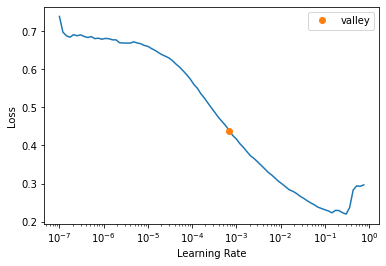

In [185]:
learn.lr_find()

In [186]:
learn.fit(5, 0.0006918309954926372)

epoch,train_loss,valid_loss,accuracy,time
0,0.180994,0.112090,0.992857,00:00
1,0.110414,0.045060,0.992857,00:00
2,0.078440,0.027047,0.992857,00:00
3,0.058006,0.021175,0.992857,00:00
4,0.044445,0.017627,0.992857,00:00


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.227918,0.140090,0.992857,0.007143,00:00
1,0.137797,0.050153,0.992857,0.007143,00:00
2,0.101302,0.033228,0.992857,0.007143,00:00
3,0.077143,0.028659,0.992857,0.007143,00:00
4,0.062677,0.023005,0.992857,0.007143,00:00
5,0.050010,0.018983,0.992857,0.007143,00:00
6,0.040562,0.016535,0.992857,0.007143,00:00
7,0.033397,0.015198,0.992857,0.007143,00:00
8,0.027609,0.013984,0.992857,0.007143,00:00
9,0.023070,0.014408,0.992857,0.007143,00:00


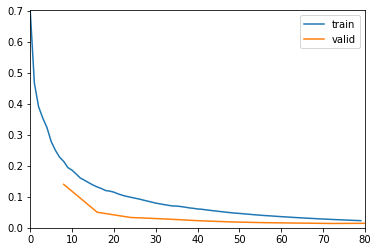

In [187]:
dls = to.dataloaders(bs=64)
learn = tabular_learner(dls, [200,100], metrics=[accuracy, error_rate])
learn.fit(10, 0.0006918309954926372, cbs=[ShowGraphCallback()])

In [188]:
row, cls, probs = learn.predict(df_fai.iloc[0])

In [189]:
row.show()

,AA,AC,AG,AT,CA,CC,CG,CT,GA,GC,GG,GT,TA,TC,TG,TT,lamada_1,lamada_2,lamada_3,lamada_4,lamada_5,lamada_6,lamada_7,lamada_8,lamada_9,lamada_10,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,AGG,AGT,ATA,ATC,ATG,ATT,CAA,CAC,CAG,CAT,CCA,CCC,CCG,CCT,CGA,CGC,CGG,CGT,CTA,CTC,CTG,CTT,GAA,GAC,GAG,GAT,GCA,GCC,GCG,GCT,GGA,GGC,GGG,GGT,GTA,GTC,GTG,GTT,TAA,TAC,TAG,TAT,TCA,TCC,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT,AAAA,AAAC,AAAG,AAAT,AACA,AACC,AACG,AACT,AAGA,AAGC,AAGG,AAGT,AATA,AATC,AATG,AATT,ACAA,ACAC,ACAG,ACAT,ACCA,ACCC,ACCG,ACCT,ACGA,ACGC,ACGG,ACGT,ACTA,ACTC,ACTG,ACTT,AGAA,AGAC,AGAG,AGAT,AGCA,AGCC,AGCG,AGCT,AGGA,AGGC,AGGG,AGGT,AGTA,AGTC,AGTG,AGTT,ATAA,ATAC,ATAG,ATAT,ATCA,ATCC,ATCG,ATCT,ATGA,ATGC,ATGG,ATGT,ATTA,ATTC,ATTG,ATTT,CAAA,CAAC,CAAG,CAAT,CACA,CACC,CACG,CACT,CAGA,CAGC,CAGG,CAGT,CATA,CATC,CATG,CATT,CCAA,CCAC,CCAG,CCAT,CCCA,CCCC,CCCG,CCCT,CCGA,CCGC,CCGG,CCGT,CCTA,CCTC,CCTG,CCTT,CGAA,CGAC,CGAG,CGAT,CGCA,CGCC,CGCG,CGCT,CGGA,CGGC,CGGG,CGGT,CGTA,CGTC,CGTG,CGTT,CTAA,CTAC,CTAG,CTAT,CTCA,CTCC,CTCG,CTCT,CTGA,CTGC,CTGG,CTGT,CTTA,CTTC,CTTG,CTTT,GAAA,GAAC,GAAG,GAAT,GACA,GACC,GACG,GACT,GAGA,GAGC,GAGG,GAGT,GATA,GATC,GATG,GATT,GCAA,GCAC,GCAG,GCAT,GCCA,GCCC,GCCG,GCCT,GCGA,GCGC,GCGG,GCGT,GCTA,GCTC,GCTG,GCTT,GGAA,GGAC,GGAG,GGAT,GGCA,GGCC,GGCG,GGCT,GGGA,GGGC,GGGG,GGGT,GGTA,GGTC,GGTG,GGTT,GTAA,GTAC,GTAG,GTAT,GTCA,GTCC,GTCG,GTCT,GTGA,GTGC,GTGG,GTGT,GTTA,GTTC,GTTG,GTTT,TAAA,TAAC,TAAG,TAAT,TACA,TACC,TACG,TACT,TAGA,TAGC,TAGG,TAGT,TATA,TATC,TATG,TATT,TCAA,TCAC,TCAG,TCAT,TCCA,TCCC,TCCG,TCCT,TCGA,TCGC,TCGG,TCGT,TCTA,TCTC,TCTG,TCTT,TGAA,TGAC,TGAG,TGAT,TGCA,TGCC,TGCG,TGCT,TGGA,TGGC,TGGG,TGGT,TGTA,TGTC,TGTG,TGTT,TTAA,TTAC,TTAG,TTAT,TTCA,TTCC,TTCG,TTCT,TTGA,TTGC,TTGG,TTGT,TTTA,TTTC,TTTG,TTTT,AAAAA,AAAAC,AAAAG,AAAAT,AAACA,AAACC,AAACG,AAACT,AAAGA,AAAGC,AAAGG,AAAGT,AAATA,AAATC,AAATG,AAATT,AACAA,AACAC,AACAG,AACAT,AACCA,AACCC,AACCG,AACCT,AACGA,AACGC,AACGG,AACGT,AACTA,AACTC,AACTG,AACTT,AAGAA,AAGAC,AAGAG,AAGAT,AAGCA,AAGCC,AAGCG,AAGCT,AAGGA,AAGGC,AAGGG,AAGGT,AAGTA,AAGTC,AAGTG,AAGTT,AATAA,AATAC,AATAG,AATAT,AATCA,AATCC,AATCG,AATCT,AATGA,AATGC,AATGG,AATGT,AATTA,AATTC,AATTG,AATTT,ACAAA,ACAAC,ACAAG,ACAAT,ACACA,ACACC,ACACG,ACACT,ACAGA,ACAGC,ACAGG,ACAGT,ACATA,ACATC,ACATG,ACATT,ACCAA,ACCAC,ACCAG,ACCAT,ACCCA,ACCCC,ACCCG,ACCCT,ACCGA,ACCGC,ACCGG,ACCGT,ACCTA,ACCTC,ACCTG,ACCTT,ACGAA,ACGAC,ACGAG,ACGAT,ACGCA,ACGCC,ACGCG,ACGCT,ACGGA,ACGGC,ACGGG,ACGGT,ACGTA,ACGTC,ACGTG,ACGTT,ACTAA,ACTAC,ACTAG,ACTAT,ACTCA,ACTCC,ACTCG,ACTCT,ACTGA,ACTGC,ACTGG,ACTGT,ACTTA,ACTTC,ACTTG,ACTTT,AGAAA,AGAAC,AGAAG,AGAAT,AGACA,AGACC,AGACG,AGACT,AGAGA,AGAGC,AGAGG,AGAGT,AGATA,AGATC,AGATG,AGATT,AGCAA,AGCAC,AGCAG,AGCAT,AGCCA,AGCCC,AGCCG,AGCCT,AGCGA,AGCGC,AGCGG,AGCGT,AGCTA,AGCTC,AGCTG,AGCTT,AGGAA,AGGAC,AGGAG,AGGAT,AGGCA,AGGCC,AGGCG,AGGCT,AGGGA,AGGGC,AGGGG,AGGGT,AGGTA,AGGTC,AGGTG,AGGTT,AGTAA,AGTAC,AGTAG,AGTAT,AGTCA,AGTCC,AGTCG,AGTCT,AGTGA,AGTGC,AGTGG,AGTGT,AGTTA,AGTTC,AGTTG,AGTTT,ATAAA,ATAAC,ATAAG,ATAAT,ATACA,ATACC,ATACG,ATACT,ATAGA,ATAGC,ATAGG,ATAGT,ATATA,ATATC,ATATG,ATATT,ATCAA,ATCAC,ATCAG,ATCAT,ATCCA,ATCCC,ATCCG,ATCCT,ATCGA,ATCGC,ATCGG,ATCGT,ATCTA,ATCTC,ATCTG,ATCTT,ATGAA,ATGAC,ATGAG,ATGAT,ATGCA,ATGCC,ATGCG,ATGCT,ATGGA,ATGGC,ATGGG,ATGGT,ATGTA,ATGTC,ATGTG,ATGTT,ATTAA,ATTAC,ATTAG,ATTAT,ATTCA,ATTCC,ATTCG,ATTCT,ATTGA,ATTGC,ATTGG,ATTGT,ATTTA,ATTTC,ATTTG,ATTTT,CAAAA,CAAAC,CAAAG,CAAAT,CAACA,CAACC,CAACG,CAACT,CAAGA,CAAGC,CAAGG,CAAGT,CAATA,CAATC,CAATG,CAATT,CACAA,CACAC,CACAG,CACAT,CACCA,CACCC,CACCG,CACCT,CACGA,CACGC,CACGG,CACGT,CACTA,CACTC,CACTG,CACTT,CAGAA,CAGAC,CAGAG,CAGAT,CAGCA,CAGCC,CAGCG,CAGCT,CAGGA,CAGGC,CAGGG,CAGGT,CAGTA,CAGTC,CAGTG,CAGTT,CATAA,CATAC,CATAG,CATAT,CATCA,CATCC,CATCG,CATCT,CATGA,CATGC,CATGG,CATGT,CATTA,CATTC,CATTG,CATTT,CCAAA,CCAAC,CCAAG,CCAAT,CCACA,CCACC,CCACG,CCACT,CCAGA,CCAGC,CCAGG,CCAGT,CCATA,CCATC,CCATG,CCATT,CCCAA,CCCAC,CCCAG,CCCAT,CCCCA,CCCCC,CCCCG,CCCCT,CCCGA,CCCGC,CCCGG,CCCGT,CCCTA,CCCTC,CCCTG,CCCTT,CCGAA,CCGAC,CCGAG,CCGAT,CCGCA,CCGCC,CCGCG,CCGCT,CCGGA,CCGGC,CCGGG,CCGGT,CCGTA,CCGTC,CCGTG,CCGTT,CCTAA,CCTAC,CCTAG,CCTAT,CCTCA,CCTCC,CCTCG,CCTCT,CCTGA,CCTGC,CCTGG,CCTGT,CCTTA,CCTTC,CCTTG,CCTTT,CGAAA,CGAAC,CGAAG,CG

In [190]:
dl = learn.dls.test_dl(df_fai.iloc[:100])

In [191]:
dl.show_batch()

In [192]:
learn.validate(dl=dl)

(#3) [0.0027945220936089754,1.0,0.0]

In [193]:
preds = learn.get_preds(dl=dl)

In [194]:
preds[0][0]

tensor([0.0010, 0.9990])

In [195]:
interp = ClassificationInterpretation.from_learner(learn)

In [196]:
cnf_matrix = interp.confusion_matrix()
print(cnf_matrix)

[[63  1]
 [ 0 76]]


In [197]:
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)
# F1 Score
F1_Score = 2*(PPV*TPR)/(PPV+TPR) 
# MCC
MCC = (TP*TN - FP*FN) / ((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))**0.5
print("Sensitivity or Recall = ", TPR)
print("Specificity =  ", TNR)
print("Precision = ", PPV)
print("Overall Accuracy for each class = ", ACC)
print("F1 Score = ", F1_Score)
print("MCC = ", MCC)

Sensitivity or Recall =  [0.984375 1.      ]
Specificity =   [1.       0.984375]
Precision =  [1.         0.98701299]
Overall Accuracy for each class =  [0.99285714 0.99285714]
F1 Score =  [0.99212598 0.99346405]
MCC =  [0.98569311 0.98569311]


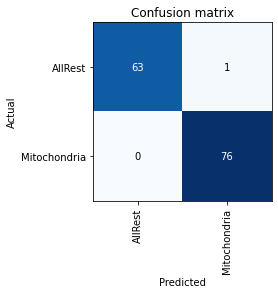

In [198]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
#print(losses)
len(dls.valid_ds)==len(losses)==len(idxs)
interp.plot_confusion_matrix()

In [199]:
interp.print_classification_report()

              precision    recall  f1-score   support

     AllRest       1.00      0.98      0.99        64
Mitochondria       0.99      1.00      0.99        76

    accuracy                           0.99       140
   macro avg       0.99      0.99      0.99       140
weighted avg       0.99      0.99      0.99       140



In [ ]:
class roc(Callback):
    '''
    Updated on March 28 2019 to reflect new change in FastAI's Callback
    ROC_AUC metric callback for fastai. Compute ROC score over each batch and returns the average over batches.
    TO DO: rolling average
    '''
    def on_epoch_begin(self, **kwargs):
        self.total = 0
        self.batch_count = 0
    
    def on_batch_end(self, last_output, last_target, **kwargs):
        preds = F.softmax(last_output, dim=1)
        # roc_auc_score does not work on batches which does not contain both classes.
        try:
            roc_score = roc_auc_score(to_np(last_target), to_np(preds[:,1]))
            self.total += roc_score
            self.batch_count += 1
        except:
            pass
    
    def on_epoch_end(self, last_metrics, **kwargs):
        return add_metrics(last_metrics, self.total/self.batch_count)